In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\samar\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [48]:
teams = pd.read_csv("teams.csv")

In [49]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [50]:
teamsMini = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [51]:
teamsMini.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [52]:
teamsMini.corr()["medals"] # to see the correlation and see if it is possible to predict given what columns

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

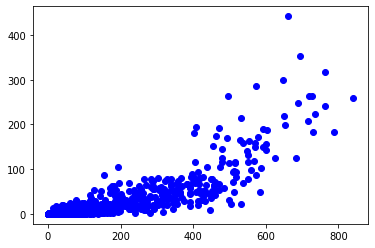

In [53]:
plt.plot(teamsMini['athletes'], teamsMini['medals'], 'ob')
plt.show()

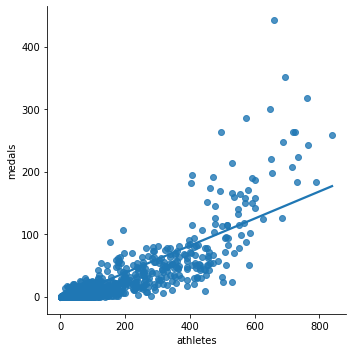

In [54]:
sns.lmplot(x="athletes", y="medals", data=teamsMini, fit_reg=True, ci=None)
plt.show()

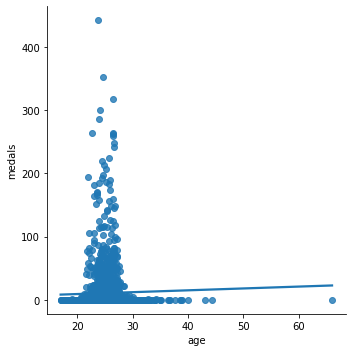

In [55]:
sns.lmplot(x="age", y="medals", data=teamsMini, fit_reg=True, ci=None) # no relation
plt.show()

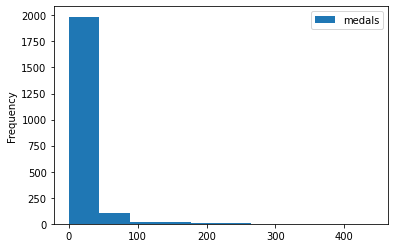

In [56]:
teamsMini.plot.hist(y="medals")
plt.show() #huge imbalance (0-50 compared to higher earning medals)

In [57]:
teamsMini[teamsMini.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [58]:
teamsDrop = teamsMini.dropna()
teamsDrop

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [59]:
teamsDrop['year'].max()
teamsDrop['year'].min()

1964

In [60]:
train = teamsDrop[teamsDrop['year'] < 2008].copy() # 70-30 -> for 80-20 ~ 2012
test = teamsDrop[teamsDrop['year'] >= 2008].copy()

In [61]:
train.shape

(1410, 7)

In [62]:
test.shape

(604, 7)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [64]:
reg = LinearRegression()

In [65]:
pred = ["athletes", "prev_medals"] # columns used to predict the target
targ = "medals"

In [66]:
reg.fit(train[pred], train[targ])

LinearRegression()

In [67]:
predictions = reg.predict(test[pred])
predictions.shape

(604,)

In [75]:
# test.drop(["predictions"], inplace=True, axis=1)
test["predictions"] = predictions
test.loc[test["predictions"] < 0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
5,AFG,Afghanistan,2008,4,22.5,0.0,1,0.0
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
18,AHO,Netherlands Antilles,2008,4,23.0,0.0,0,0.0
23,ALB,Albania,2008,12,27.2,0.0,0,0.0
...,...,...,...,...,...,...,...,...
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4,1.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.0


In [93]:
reg.score(train[pred], train[targ])

0.8621978229170417

In [92]:
reg.score(test[pred], test[targ])

0.9016896450216315

In [113]:
error = mean_absolute_error(test["medals"], test["predictions"])
error
# if error is below std then you are good, 
# if it is higher, then something is wrong (wrong predictors, or wrong model)

3.6374172185430464

In [77]:
teamsDrop.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [112]:
mean_absolute_error(train["medals"], (reg.predict(train[pred])).round())

5.287943262411347

In [78]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2052,USA,United States,2008,763,26.4,263.0,317,251.0
2053,USA,United States,2012,689,26.7,317.0,248,287.0
2054,USA,United States,2016,719,26.4,248.0,264,237.0


In [79]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
906,IND,India,2008,67,25.4,1.0,3,3.0
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [95]:
errors = (test["medals"] - test["predictions"]).abs()
errors

5       1.0
6       1.0
7       0.0
18      0.0
23      0.0
       ... 
2131    0.0
2132    0.0
2141    3.0
2142    1.0
2143    0.0
Length: 604, dtype: float64

In [96]:
errorByTeam = errors.groupby(test["team"]).mean()
errorByTeam

team
AFG    0.666667
AHO    0.000000
ALB    0.000000
ALG    1.000000
AND    0.000000
         ...   
VIE    1.000000
VIN    0.000000
YEM    0.000000
ZAM    0.000000
ZIM    1.333333
Length: 206, dtype: float64

In [97]:
medalsByTeam = test["medals"].groupby(test["team"]).mean()
medalsByTeam

team
AFG    0.666667
AHO    0.000000
ALB    0.000000
ALG    1.666667
AND    0.000000
         ...   
VIE    1.000000
VIN    0.000000
YEM    0.000000
ZAM    0.000000
ZIM    1.333333
Name: medals, Length: 206, dtype: float64

In [105]:
errorRatio = errorByTeam / medalsByTeam
errorRatio # nan cause of countries that has 0 medals

team
AFG    1.0
AHO    NaN
ALB    NaN
ALG    0.6
AND    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    1.0
Length: 206, dtype: float64

In [104]:
errorRatio[~pd.isnull(errorRatio)] 

team
AFG    1.000000
ALG    0.600000
ARG    0.445652
ARM    0.692308
AUS    0.231884
         ...   
USA    0.159228
UZB    0.500000
VEN    2.800000
VIE    1.000000
ZIM    1.000000
Length: 108, dtype: float64

In [106]:
errorRatio = errorRatio[np.isfinite(errorRatio)] # inf if error = 1 and medals = 0
errorRatio

team
AFG    1.000000
ALG    0.600000
ARG    0.445652
ARM    0.692308
AUS    0.231884
         ...   
USA    0.159228
UZB    0.500000
VEN    2.800000
VIE    1.000000
ZIM    1.000000
Length: 107, dtype: float64

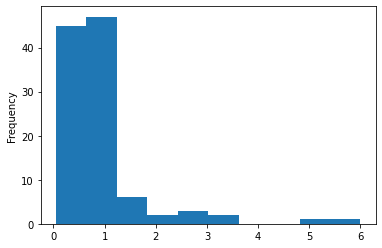

In [108]:
errorRatio.plot.hist()
plt.show()

In [109]:
errorRatio.sort_values()

team
FRA    0.050980
NZL    0.076923
CAN    0.088050
PRK    0.105263
GBR    0.130682
         ...   
ECU    3.000000
AUT    3.400000
EGY    3.500000
CHI    5.000000
HKG    6.000000
Length: 107, dtype: float64